### BFMatcher 디스크립터 매칭기

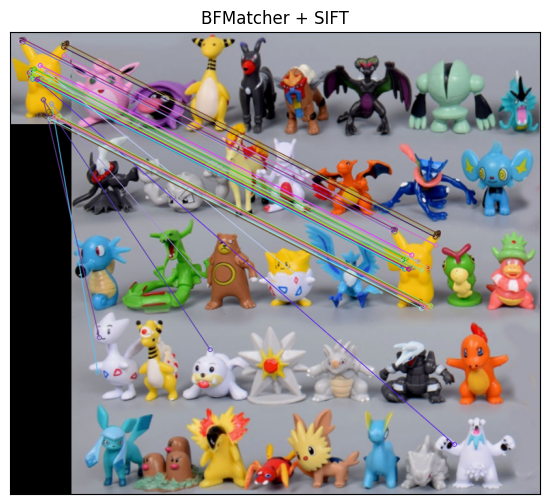

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./images/pica.jpg')
img2 = cv2.imread('./images/figures.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 서술자 추출기 생성 ---①
detector = cv2.SIFT_create()
# 각 영상에 대해 키 포인트와 서술자 추출 ---②
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, L1 거리, 상호 체크 ---③
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 결과 그리기 ---⑤
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력 

plt.figure(figsize = (10,6))
imgs = {'BFMatcher + SIFT':res}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,1,i+1)
    plt.title(k)
    plt.imshow(v[:,:,(2,1,0)])
    plt.xticks([]),plt.yticks([])

plt.show()